### This code is used to produce Figure 7 and produce results mentioned in the quantization and double compression detection sections

In [6]:
from utils import * 

import imageio
import numpy as np
import scipy
from scipy.fftpack import dct
from scipy.signal import correlate
from math import floor
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
sns.set_style("whitegrid")
greys = sns.color_palette("Greys")
%matplotlib inline

### Compute the DCT of the blocks in each image

In [71]:
im2 = imageio.imread('../img/test2.png')
im3 = imageio.imread('../img/test3.png')

blocks2 = img_to_blocks(im2)
dct_blocks2 = dct2(blocks2)

blocks3 = img_to_blocks(im3)
dct_blocks3 = dct2(blocks3)
im3dc = dct_blocks3[:,:,0,0].flatten()

In [79]:
arr = np.random.rand(100000) * 100

a = 8
b = 10

qa = a * (arr // a)
qab = b * (qa // b)

qb = b * (arr // b)
qba = a * (qb // a)

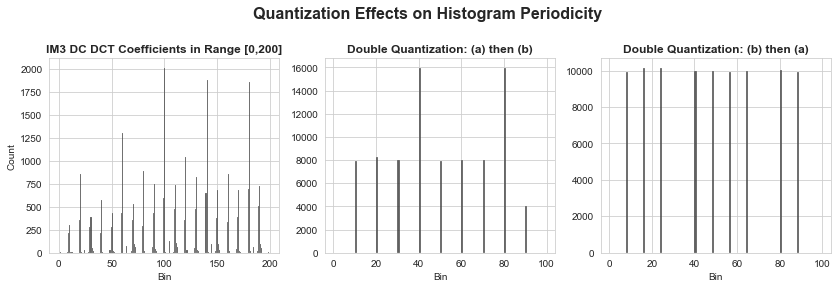

In [82]:
bins=range(1, 100, 1)
fig, axs = plt.subplots(1, 3, sharey=False, figsize=(14, 4))
fig.suptitle('Quantization Effects on Histogram Periodicity', fontsize=16, weight='bold')
fig.subplots_adjust(top=0.8)

sns.histplot(im3dc, bins=range(1, 200, 1), color=greys[5], ax=axs[0])
axs[0].set(xlabel='Bin')
axs[0].set_title(label='IM3 DC DCT Coefficients in Range [0,200]', weight='bold', fontsize=12)


sns.histplot(qab, bins=bins, color=greys[5], ax=axs[1])
axs[1].set(xlabel='Bin')
axs[1].set(ylabel='')
axs[1].set_title(label='Double Quantization: (a) then (b)', weight='bold', fontsize=12)

sns.histplot(qba, bins=bins, color=greys[5], ax=axs[2])
axs[2].set(xlabel='Bin')
axs[2].set(ylabel='')
axs[2].set_title(label='Double Quantization: (b) then (a)', weight='bold', fontsize=12)


sns.set_context(font_scale = 2)
fig.savefig('figures/Fig6.png', format='png', dpi=500) #Increase DPI for final plot


### This code is used to produce $Table_{QF}$ for a given quantization factor

In [83]:
t = np.array([[16, 11, 10, 16],[12, 12, 14, 19],[14, 13, 16, 24], [14, 17, 22, 29]])

def get_quantized_output(t, QF):
    return np.floor(t * (2 - (QF/50)) + .5)

get_quantized_output(t, 70)  # 74 -> 76

array([[10.,  7.,  6., 10.],
       [ 7.,  7.,  8., 11.],
       [ 8.,  8., 10., 14.],
       [ 8., 10., 13., 17.]])